<a href="https://colab.research.google.com/github/heraldolimajr/Large-Language-Mode/blob/main/Context_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Prática realizada por Heraldo Gonçalves Lima Junior




---



# Exercício 1 - Token Embeddings (Operações e contextualização)

Conforme visto em sala de aula, existem várias técnicas de tokenização: word token, subword token, character token, byte token, dentre outras que podem obter resultados mistos. Esse exercício abordará embeddings para word tokens, ou word embeddings. Nesse contexto, siga as instruções:

**a)** escolha no mínimo 2 grupos de palavras relacionadas, cada grupo contendo no mínimo 3 palavras.
Ex.:

*   Palavras relacionadas a paisagem
    *   ceu
    *   montanha
    *   rio
*   Palavras relacionadas a estudo
    *   caderno
    *   escola
    *   livro

**b)** Em seguida, obtenha os embeddings das palavras.

**c)** Utilize algum método de redução de dimensionalidade para reduzir os vetores dos embeddings para apenas 2 dimensões.

**d)** Faça o "plot" em um plano bidimensional com os valores obtidos, comparando os resultados referentes aos diferentes modelos.

**e)** Execute operações de soma e subtração com os vetores e observe os resultados obtidos.

**f)** Para comparar outras formas de gerar embeddings, utilize o modelo BERT de forma a gerar word embeddings a partir de frases e veja o resultado obtido.

## Sugestão: Utilize bibliotecas para ter acesso a modelos pré-treinados

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>O código a seguir instala bibliotecas para permitir utilizar os embeddings do GloVe, Word2Vec e BERT</b>

In [ ]:
!pip install gensim

A seguir, exemplo de código utilizando a lib gensim para carregar vetores de modelos pré-treinados como GloVe e Word2vec.

In [ ]:
# Suprimindo warnings
import warnings
warnings.filterwarnings('ignore')

# Sugestão de utilização
# Importando libs necessárias
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors

# Imprimindo a lista de modelos disponíveis em gensim-data
print(list(api.info()['models'].keys()))



['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Os modelos sugeridos GloVe e Word2vec estão disponíveis a partir de 'glove-wiki-gigaword-100' e 'word2vec-google-news-300', respectivamente. Deve demorar alguns minutos dependendo do tamanho do modelo que você escolher.

In [ ]:
# Carregue os vetores dos modelos pré-treinados utilizando o método "load()" do objeto api.
#TODO
glove = api.load('glove-wiki-gigaword-100')
word2vec = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Verificar o tamanho do vetor (dimensões) de uma palavra
print(glove['king'].shape)
print(word2vec['king'].shape)


(100,)
(300,)


# **EXERCÍCIO**
# **a)** Escolha suas palavras, inicialmente em idioma inglês.

In [ ]:
# Palavras em inglês
words = ["exercise", "hydration", "sleep", "nutrition", "wellness",
         "mindfulness", "hygiene", "fitness", "meditation", "routine", "prevention"]


Agora obtenha os embeddings do modelo carregado anteriormente acessando a chave no vetor.

In [ ]:
# O modelo funciona como um dicionário, acesse a chave correspondente ao token

#TODO defina abaixo a variavel emb_palavras, contendo a lista de embeddings
# de 'words'. Se quiser saber o embedding de 'casa', por exemplo, faz-se glove['casa']
#O IF verifica se a palavra existe no vocabulário do modelo
emb_palavras = np.array([glove[word] for word in words if word in glove])
# Imprimindo os 5 primeiros valores para cada embedding
print(emb_palavras[:, :5])

[[-5.1510e-01 -3.4688e-01 -3.2370e-01  4.4684e-02 -9.4621e-01]
 [-2.6886e-01  3.8526e-02  1.1407e-01 -3.1610e-01 -6.7341e-01]
 [-1.1599e-01  2.4951e-01  1.2368e-01  2.2827e-01 -9.8004e-01]
 [ 1.1449e-01  2.5288e-01 -1.5698e-01 -1.6036e-01 -3.0469e-01]
 [ 5.5892e-01 -2.7245e-01 -8.7100e-01 -3.5233e-02 -1.1758e-01]
 [-1.3515e-01  7.5401e-01 -5.3005e-01  1.5522e-01 -1.8960e-01]
 [ 5.0782e-01 -1.1051e-03 -3.4459e-01 -3.2213e-01 -8.5641e-01]
 [ 1.2616e-01 -1.0562e-01 -9.2165e-02 -1.5796e-01 -1.1061e+00]
 [ 1.3907e-01  8.9881e-01 -8.0743e-01  1.0285e+00  2.3685e-01]
 [-2.2679e-01 -4.2622e-01 -6.9540e-02  4.9605e-02 -7.1431e-01]
 [ 6.8126e-02  4.4500e-02 -1.2464e-01 -3.3842e-01  3.5371e-01]]


In [ ]:
print(words)
print(emb_palavras)

['exercise', 'hydration', 'sleep', 'nutrition', 'wellness', 'mindfulness', 'hygiene', 'fitness', 'meditation', 'routine', 'prevention']
[[-0.5151   -0.34688  -0.3237   ... -1.1637    0.43863   0.66091 ]
 [-0.26886   0.038526  0.11407  ... -0.52507   0.44699   0.32197 ]
 [-0.11599   0.24951   0.12368  ... -0.15943   0.43352  -0.19394 ]
 ...
 [ 0.13907   0.89881  -0.80743  ... -1.2429   -0.097982  0.52638 ]
 [-0.22679  -0.42622  -0.06954  ... -0.24441  -0.11606   0.40987 ]
 [ 0.068126  0.0445   -0.12464  ... -0.51559   0.91266  -0.27776 ]]


Teste os modelos carregados tentando imprimir algumas palavras em português e veja o que acontece. Lembre-se que o modelo foi treinado sem caracteres acentuados ou case do caractere.

In [ ]:
print(glove['bodega'].shape)
print(word2vec['umbu'].shape)


# print(w2v_v['gente'].shape)

(100,)


KeyError: "Key 'umbu' not present"

Perceba que estamos utilizando modelos pré-treinados com corpus do idioma inglês. Portanto, no corpus ficaram faltando muitas palavras de outros idiomas como o português.

Faça o download do arquivo pré-treinado em Word2Vec do FastText no endereço https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec e carregue-o em uma variável.

**Sugestão:** Faça o download com o comando wget e utilize o método load_word2vec_format() do KeyedVectors da lib gensim.


In [ ]:
# Faça o download do arquivo
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec

--2025-09-10 03:25:17--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.171.22.68, 3.171.22.33, 3.171.22.13, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.171.22.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1560834949 (1.5G) [binary/octet-stream]
Saving to: ‘wiki.pt.vec.1’

wiki.pt.vec.1       100%[===================>]   1.45G  60.8MB/s    in 58s     

2025-09-10 03:26:16 (25.5 MB/s) - ‘wiki.pt.vec.1’ saved [1560834949/1560834949]



In [ ]:
# Carregue o modelo a partir do arquivo baixado
caminho = 'wiki.pt.vec'
modelo = KeyedVectors.load_word2vec_format(caminho, binary=False)

## Escolha suas palavras agora em português e salve em um vetor.

In [ ]:
palavras = ["exercício", "hidratação", "dormir", "nutrição", "consciência", "higiene", "condicionamento", "meditação", "rotina", "prevenção"]
palavras = [p.lower() for p in palavras]
palavras_validas = [p for p in palavras if p in modelo]

print("Palavras válidas:", palavras_validas)

Palavras válidas: ['exercício', 'hidratação', 'dormir', 'nutrição', 'consciência', 'higiene', 'condicionamento', 'meditação', 'rotina', 'prevenção']


# **EXERCÍCIO**
# **b)** Crie um novo vetor que receberá os embeddings correspondentes às palavras em português que você escolheu.

In [ ]:
#TODO
embeddings_pt = np.array([modelo[palavra] for palavra in palavras if palavra in modelo])


# **EXERCÍCIO**
# **c)** Utilize algum método de redução de dimensionalidade para reduzir os vetores dos embeddings para apenas 2 dimensões.

**Sugestão:** Utilize o PCA do sklearn passando como parâmetro n_components=2.

In [ ]:
# Importando libs necessárias
from sklearn.decomposition import PCA

# Exemplo de redução para 10 dimensões
#pca = PCA(n_components=10)
#vectors_pca = pca.fit_transform(embeddings_pt)

In [ ]:
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(embeddings_pt)
vectors_pca_en = pca.fit_transform(emb_palavras)

# **EXERCÍCIO**
# **d)** Faça o "plot" em um plano bidimensional com os valores obtidos, se possível, comparando os resultados referentes a diferentes modelos.

**Sugestão:** Utilize o código da célula abaixo como exemplo de como efetuar o plot, sendo necessário ajustar a variável que contém os vetores PCA, bem como os rótulos com as palavras selecionadas.

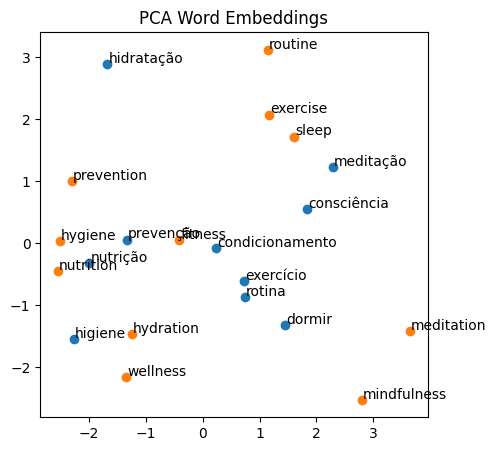

In [ ]:
# Plotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])
for i, p in enumerate(palavras):
    axes.annotate(p, (vectors_pca[i, 0]+.02, vectors_pca[i, 1]+.02))
axes.set_title('PCA Word Embeddings')

axes.scatter(vectors_pca_en[:, 0], vectors_pca_en[:, 1])
for i, w in enumerate(words):
    axes.annotate(w, (vectors_pca_en[i, 0]+.02, vectors_pca_en[i, 1]+.02))
axes.set_title('PCA Word Embeddings')
plt.show()

# Agora que você já sabe, faça um teste com outras palavras e veja como fica o plot do gráfico.

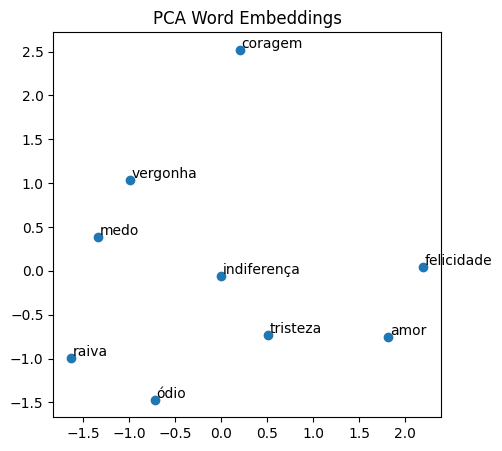

In [ ]:
# Inicie aqui definindo suas variáveis
#TODO
palavras_novas = ["amor", "raiva", "vergonha", "medo", "felicidade", "coragem", "ódio", "indiferença", "tristeza"]
embeddings_pt_novas = np.array([modelo[palavra_nova] for palavra_nova in palavras_novas if palavra_nova in modelo])
vectors_pca_novas = pca.fit_transform(embeddings_pt_novas)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca_novas[:, 0], vectors_pca_novas[:, 1])
for i, w in enumerate(palavras_novas):
    axes.annotate(w, (vectors_pca_novas[i, 0]+.02, vectors_pca_novas[i, 1]+.02))
axes.set_title('PCA Word Embeddings')
plt.show()




# Word2Vec algebra
# **EXERCÍCIO**
# **e)** Execute operações de soma e subtração com os vetores e observe os resultados obtidos.

**Sugestão:** Você pode utilizar o método "most_similar()" do modelo, utilizando os parâmetros "positive" e "negative" para operações de soma e subtração. O parâmetro "topn" controla a quantidade de resultados.

**Observação:** Caso prefira utilizar numpy para as operações, ao chamar o método "most_similar()" utilize o parâmetro "vector".

In [ ]:
# Defina as palavras
palavra1 = 'rei'
palavra2 = 'homem'
palavra3 = 'mulher'

# Efetue a operação algébrica usando most_similar
# O resultado esperado é uma palavra similar a 'rainha'
resultado = modelo.most_similar(positive=[palavra1, palavra3], negative=[palavra2], topn=1)


# Exiba o resultado da busca por similaridade
print(f"A palavra mais próxima da operação {palavra1} - {palavra2} + {palavra3} é: '{resultado[0][0]}'")
print(f"com similaridade {resultado[0][1]}")

## Espaço para testar mais operações

In [ ]:
# Agora faça você

# Defina as palavras
#TODO

# Efetue a operação algébrica
#TODO

# Exiba o resultado da busca por similaridade
#TODO

# Word2Vec vs BERT: Embeddings em contextos diferentes

Nos modelos representativos mais complexos, como o BERT, o cáculo dos valores de embedding de uma palavra pode depender dramáticamente da aplicação na frase. Isso não é por acaso e faz total sentido, pois a semântica pode ser totalmente diferente.

Por exemplo, observe a plavra 'manga' nas duas senteças abaixo:


*   "Sujei a manga da minha camisa."
*   "Quero comer manga com leite."


## Vamos testar o quanto o modelo consegue capturar o contexto na tokenização incluindo agora o BERT.

# **EXERCÍCIO**
# **f)** Para comparar outras formas de gerar embeddings, utilize o modelo BERT de forma a gerar word embeddings a partir de frases e veja o resultado obtido.

O código a seguir vai auxiliar na instanciação do modelo BERT e definição de uma função para ter acesso facilitado aos embeddings do modelo.


In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Função para obter os embeddings do BERT
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors='pt')
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :]
    return word_embedding

# **f)** (Detalhamento) Defina duas sentenças que contenham uma mesma palavra em ambas, porém com semântica diferente. Em seguide calcule os embeddings da mesma palavra nas duas sentenças, para finalmente comparar os resultados.

**Dica:** Utilize o método definido anteriormente, passando a sentença e a palavra que você deseja obter o embedding.

In [ ]:
# Defina suas sentenças
sentenca1 = "the bank has a lot of money"
sentenca2 = "i am sitting on a bank"

# Defina a palavra foco
palavra_foco = 'bank'


# Calcule os embeddings da palavra nas duas situações
es1 = get_bert_embeddings(sentenca1, palavra_foco)
es2 = get_bert_embeddings(sentenca2, palavra_foco)

# Imprima os embeddings calculados
print("Embedding da sentença 1:", es1)
print("Embedding da sentença 2:", es2)


# Calcule a similaridade
# calcular a similaridade
similaridade = cosine_similarity(es1.reshape(1, -1).detach().numpy(), es2.reshape(1, -1).detach().numpy())
print("Similaridade:", similaridade)

# Agora é com você:

In [ ]:
# Defina suas sentenças
#TODO
sentenca1 = ""
sentenca2 = ""

# Defina a palavra foco
#TODO
palavra_foco =


# Calcule os embeddings da palavra nas duas situações
#TODO. Use o método get_bert_embeddings definido acima

# Imprima os embeddings calculados


# Calcule a similaridade


# Explicação da linha de similaridade

O trecho de código `cosine_similarity(es1.reshape(1, -1).detach().numpy(), es2.reshape(1, -1).detach().numpy())` calcula a **similaridade de cosseno** entre os embeddings `es1` e `es2`.


*   **`es1` e `es2`**: São os embeddings da palavra foco nas duas sentenças, obtidos do modelo BERT. Eles são tensores do PyTorch.
*   **`.detach()`**: Este método desanexa o tensor do gráfico de computação atual, o que significa que não calcularemos gradientes para este tensor. Isso é útil quando você não precisa de backpropagation, como neste caso, onde estamos apenas comparando embeddings.
*   **`.numpy()`**: Converte o tensor PyTorch para um array NumPy. A função `cosine_similarity` do sklearn espera arrays NumPy como entrada.
*   **`.reshape(1, -1)`**: Redimensiona o array NumPy. O `reshape(1, -1)` transforma o array em um array 2D com 1 linha e tantas colunas quanto forem necessárias (-1). Isso é necessário porque a função `cosine_similarity` do sklearn espera uma entrada 2D (mesmo que você esteja comparando apenas um par de vetores).
*   **`cosine_similarity(...)`**: Esta função do módulo `sklearn.metrics.pairwise` calcula a similaridade de cosseno entre dois vetores ou matrizes de vetores. A **similaridade de cosseno** mede o ângulo entre dois vetores. Um valor de 1 indica que os vetores são idênticos em direção (mesmo que a magnitude seja diferente), 0 indica que são ortogonais (não relacionados), e -1 indica que são completamente opostos.

Em resumo, o código está obtendo os embeddings BERT para a palavra foco em duas sentenças diferentes, convertendo-os para um formato compatível com a biblioteca scikit-learn e, em seguida, calculando a similaridade de cosseno para ver quão semelhantes são esses embeddings. Um valor de similaridade de cosseno próximo a 1 indica que os embeddings são muito parecidos, sugerindo que a palavra tem um significado semelhante em ambos os contextos. Um valor próximo a 0 ou negativo sugere que a palavra tem significados diferentes.